In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [18]:
df=pd.read_csv("Mall_Customers.csv")

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate analysis

In [20]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [27]:
help(sns.displot)

Help on function displot in module seaborn.distributions:

displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing distribution plots onto a FacetGrid.
    
    This function provides access to several approaches for visualizing the
    univariate or bivariate distribution of data, including subsets of data
    defined by semantic mapping and faceting across multiple subplots. The
    ``kind`` parameter selects the approach to use:
    
    - :func:`histplot` (with ``kind="hist"``; the default)
    - :func:`kdeplot` (with ``kind="kde"``)
    - :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)
    
    Additionally, a :func:`rugplot` can be added to any kind of plot to show
    individual observations.


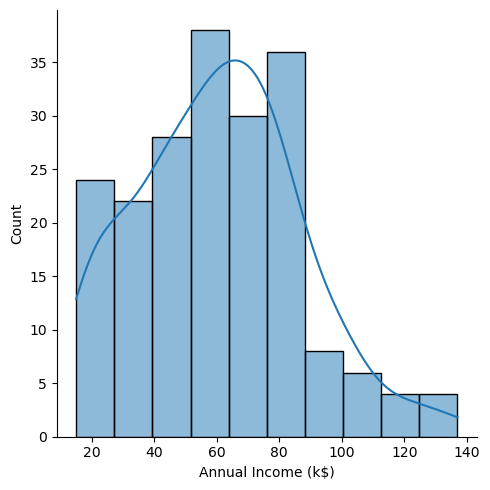

In [29]:
sns.displot(df['Annual Income (k$)'], kde=True);
# Get the current Axes object
# ax = plt.gca()
# # Set limits for the y-axis
# ax.set_xlim(0, 150)  # Adjust the limits according to your data and preference


In [30]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

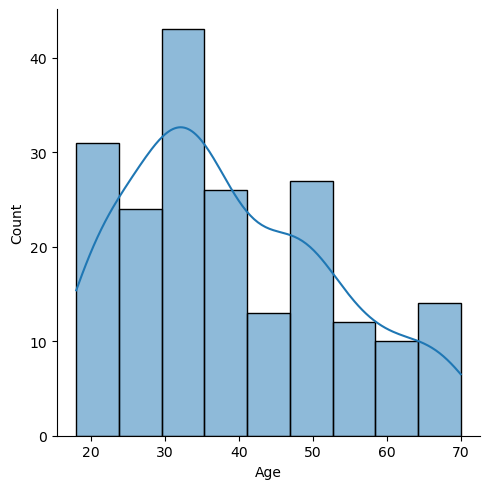

<Figure size 640x480 with 0 Axes>

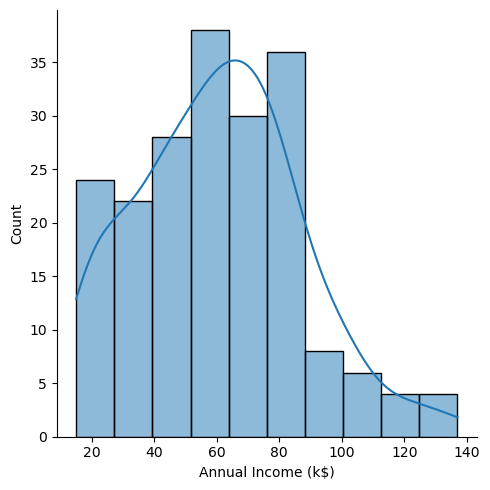

<Figure size 640x480 with 0 Axes>

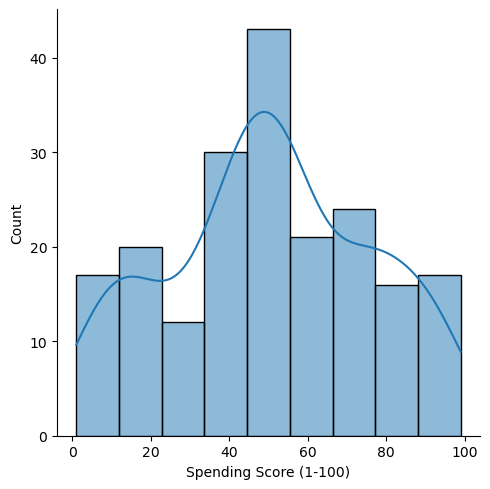

In [31]:
columns= ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.displot(df[i], kde=True)

In [36]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [38]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

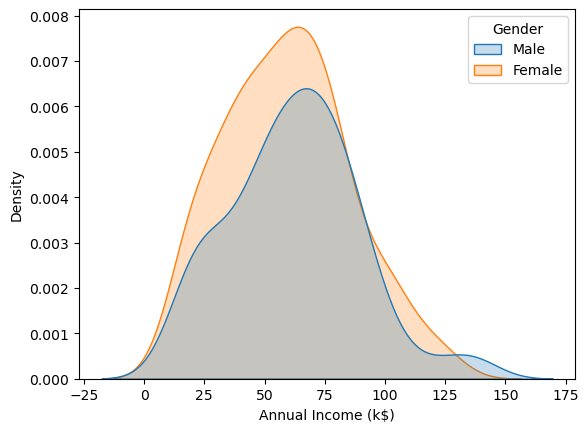

In [43]:
sns.kdeplot(df, x='Annual Income (k$)', shade=True, hue='Gender')

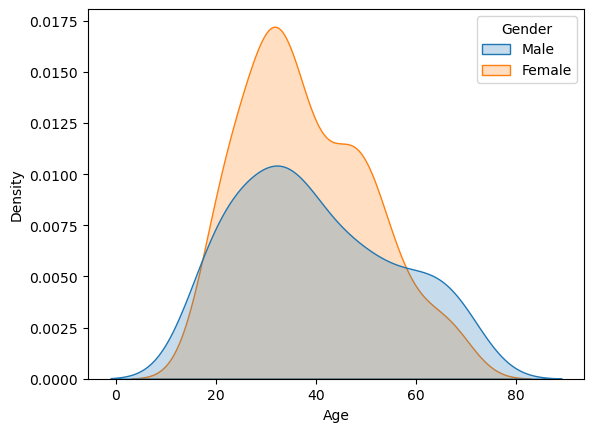

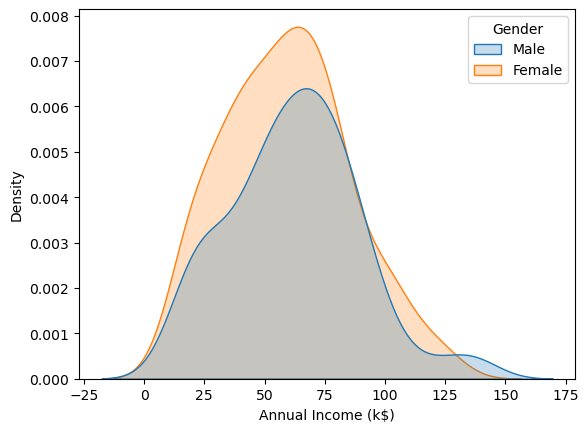

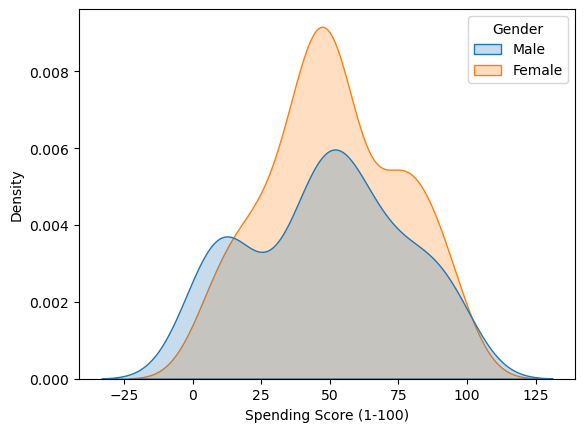

In [44]:
columns= ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df, x=i, shade=True, hue='Gender')

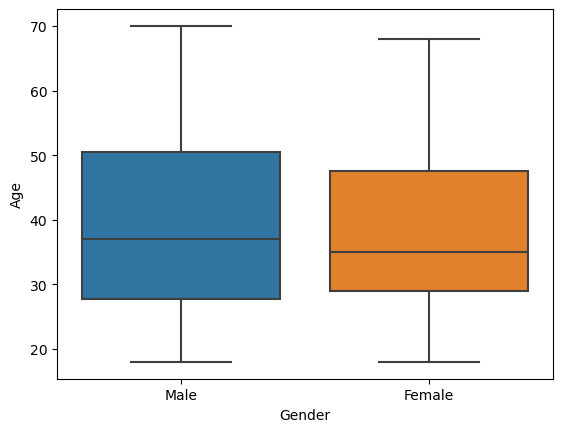

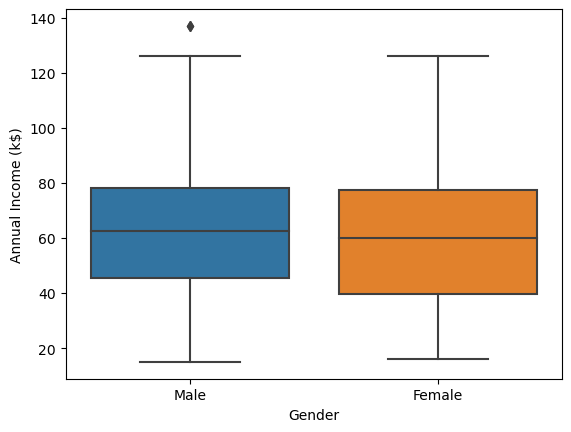

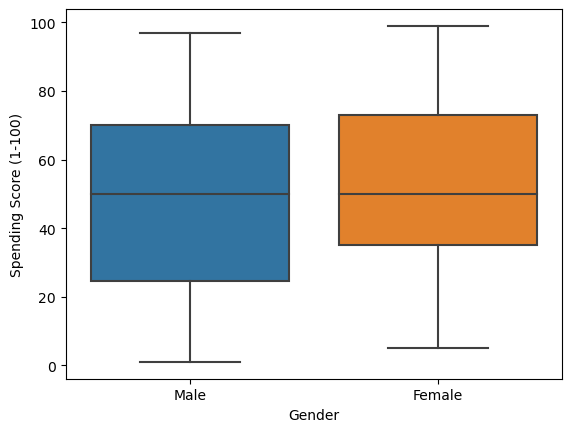

In [45]:
columns= ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(df, x="Gender", y=df[i])

In [47]:
df["Gender"].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

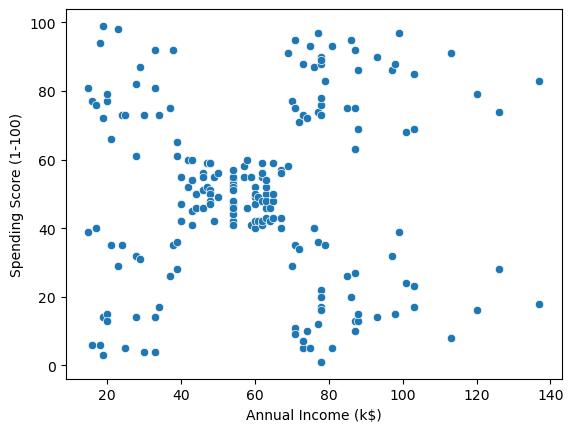

In [48]:
sns.scatterplot(df,x='Annual Income (k$)', y='Spending Score (1-100)')

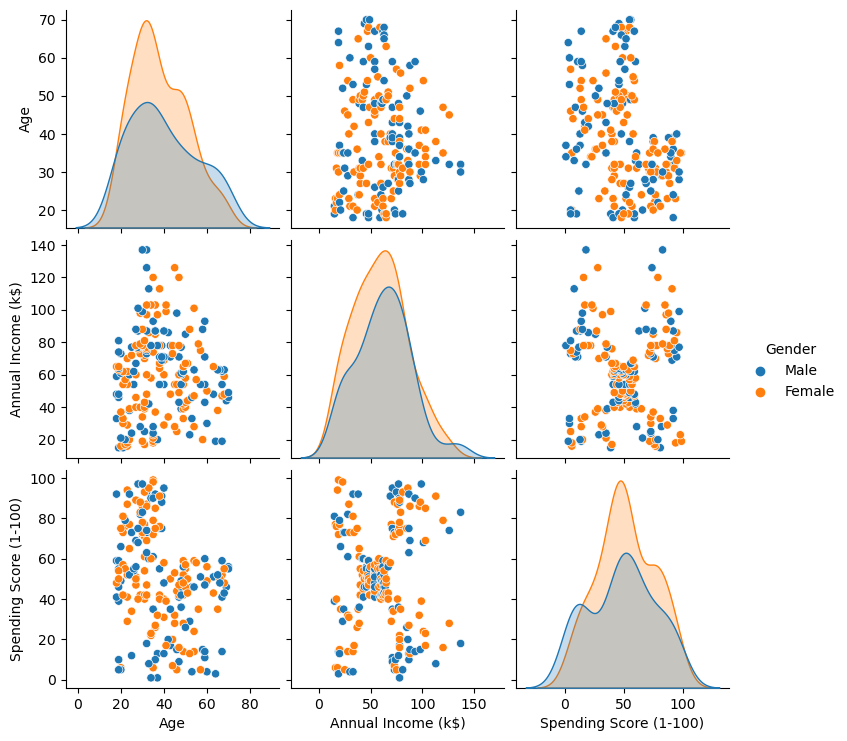

In [52]:
# df=df.drop("CustomerID", axis=1)
sns.pairplot(df, hue="Gender");

In [54]:
df.groupby(["Gender"])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [57]:
df.drop(["Gender"], axis=1).corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

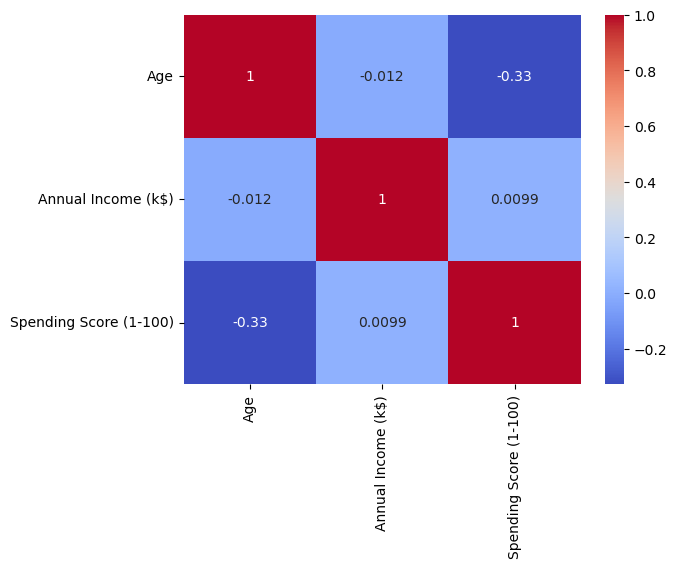

In [58]:
sns.heatmap(df.drop(["Gender"], axis=1).corr(),annot=True, cmap="coolwarm")

# Clustering - Univaraite , Bivariate, Multivariate

In [72]:
clustering1= KMeans(n_clusters=3)

In [73]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [74]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [75]:
df["Income Cluster"]=clustering1.labels_

In [76]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [77]:
df["Income Cluster"].value_counts()

Income Cluster
0    90
1    74
2    36
Name: count, dtype: int64

In [68]:
clustering1.inertia_

2822.4996947496948

In [69]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [70]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.33093093093,
 13278.112713472485,
 8481.49619047619,
 5430.245925925926,
 3941.4163614163613,
 2953.685977421271,
 2229.589704739705,
 1763.620779220779]

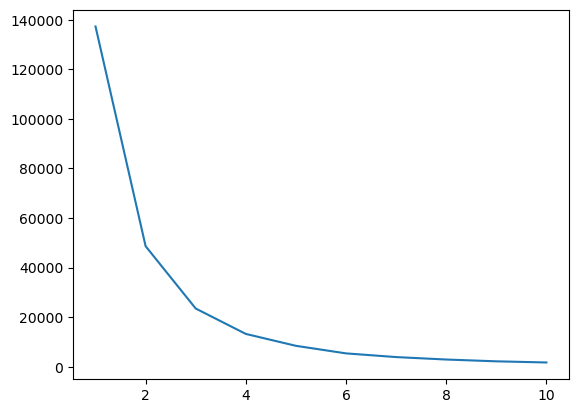

In [71]:
plt.plot(range(1,11),inertia_scores)

In [78]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [80]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster']].mean()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
Income Cluster,,,,
0,38.722222,67.088889,50.000000,0.0
1,39.500000,33.486486,50.229730,1.0
2,37.833333,99.888889,50.638889,2.0


In [84]:
clustering2= KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df["Spendind and income Cluster"]=clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spendind and income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,3
2,Female,20,16,6,1,4
3,Female,23,16,77,1,3
4,Female,31,17,40,1,4


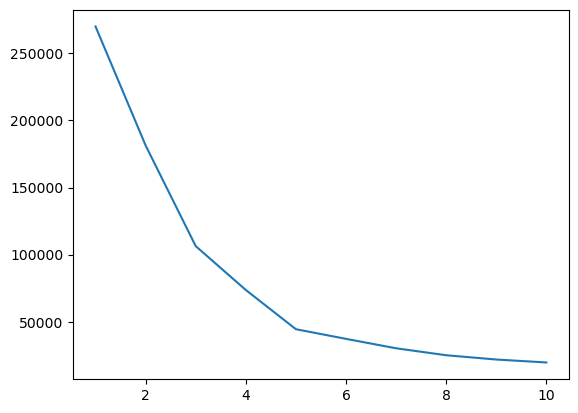

In [83]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [94]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=["x","y"]

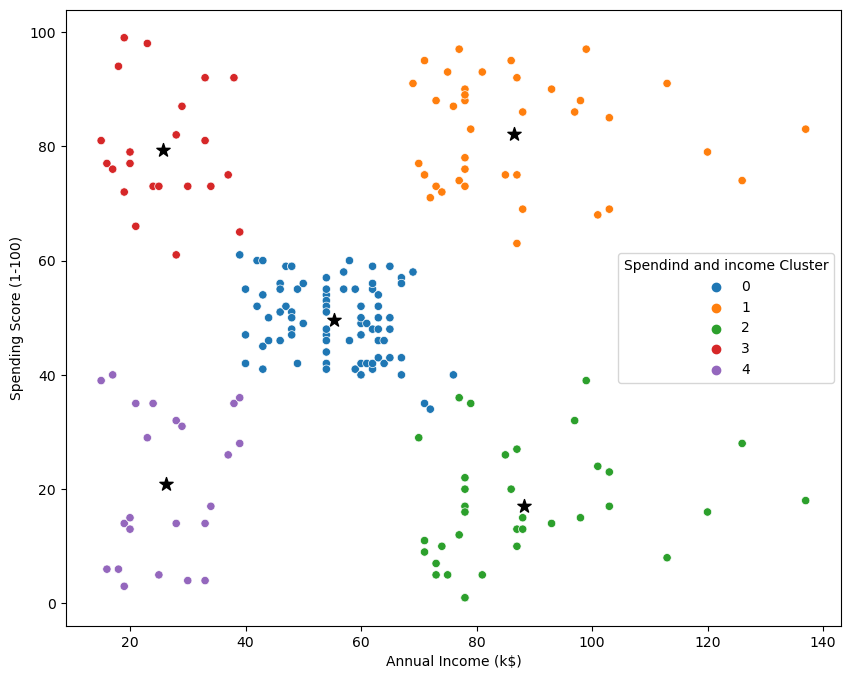

In [125]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black',marker="*")
sns.scatterplot(df,x='Annual Income (k$)', y='Spending Score (1-100)', hue="Spendind and income Cluster", palette="tab10")
plt.savefig("clustering_bivariate.png")

In [99]:

pd.crosstab(df["Spendind and income Cluster"], df["Gender"], normalize="index")

Gender,Female,Male
Spendind and income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.590909,0.409091
4,0.608696,0.391304


In [100]:
df.groupby("Spendind and income Cluster")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster']].mean()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
Spendind and income Cluster,,,,
0,42.716049,55.296296,49.518519,0.358025
1,32.692308,86.538462,82.128205,0.923077
2,41.114286,88.200000,17.114286,1.028571
3,25.272727,25.727273,79.363636,1.000000
4,45.217391,26.304348,20.913043,1.000000


# Multivariate clustering

In [101]:
from sklearn.preprocessing import StandardScaler

In [112]:
dff=pd.get_dummies(df, drop_first=True)
dff["Gender_Male"]=dff["Gender_Male"].astype(int)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spendind and income Cluster,Gender_Male
0,19,15,39,1,4,1
1,21,15,81,1,3,1
2,20,16,6,1,4,0
3,23,16,77,1,3,0
4,31,17,40,1,4,0


In [114]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spendind and income Cluster', 'Gender_Male'],
      dtype='object')

In [115]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [120]:

# Create a scaler
scale= StandardScaler()
dff=scale.fit_transform(dff)

In [122]:
dff=pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


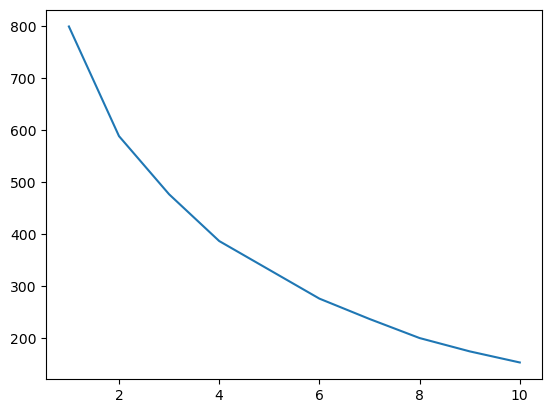

In [123]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [124]:
df.to_csv("clustring.csv")